In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Direct rebuttal: current belief

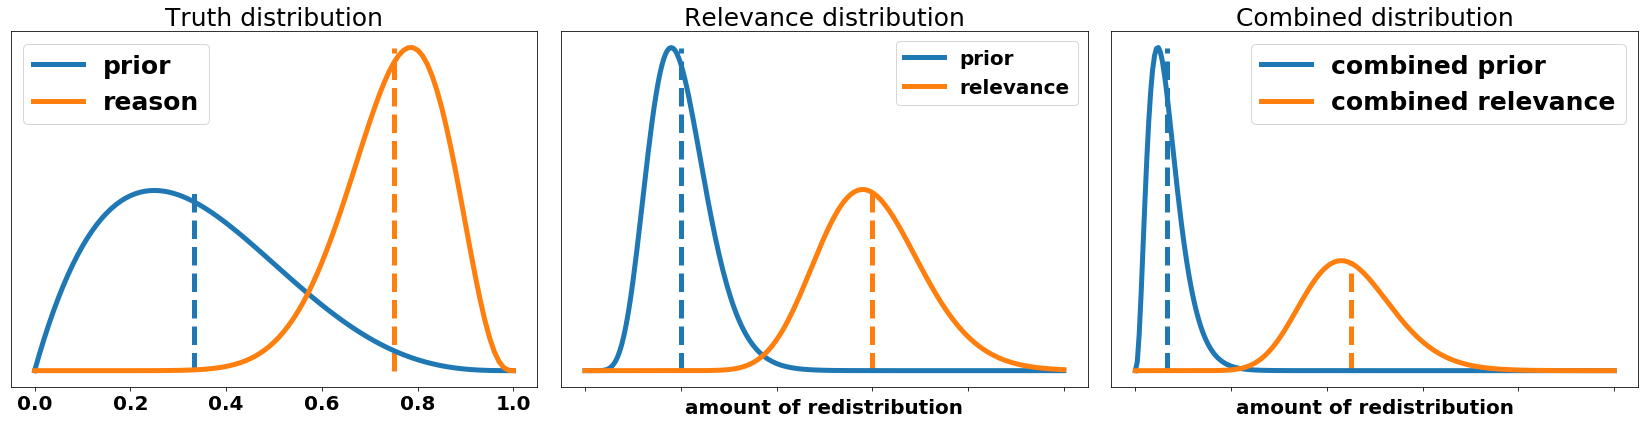

In [4]:
from scipy.stats import beta, gamma

fs_tick_labels = 15
x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

#truth
x_gn = np.linspace(0,1, 100 +1)
#prior
a_p_gn, b_p_gn = 2, 4
beta_p_gn = beta.pdf(x_gn, a_p_gn, b_p_gn)
beta_p_exp_gn = a_p_gn/(a_p_gn+b_p_gn)

#some update 
a_1_gn, b_1_gn = a_p_gn + 10, b_p_gn
beta_1_gn = beta.pdf(x_gn, a_1_gn, b_1_gn)
beta_1_exp_gn = a_1_gn/(a_1_gn+b_1_gn)

#relevance 

x_gamma_gn = np.linspace(0, 50, 250+1)

#prior
s_gn= 1
g_p_gn = 10
gamma_p_gn = gamma.pdf(x_gamma_gn, g_p_gn, scale=s_gn)

#small impact
g_1_gn = g_p_gn + 20
gamma_1_gn = gamma.pdf(x_gamma_gn, g_1_gn, scale=s_gn)

#combined

def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p_gn, gamma_beta_p_gn = gamma_beta(x_gamma_gn, a_p_gn, b_p_gn, g_p_gn, s_gn)
gb_exp_1_1_gn, gamma_beta_1_1_gn = gamma_beta(x_gamma_gn, a_1_gn, b_1_gn, g_1_gn, s_gn)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x_gn, beta_p_gn, label='prior', linewidth=5)
axs[0].plot(x_gn, beta_1_gn, label='reason', linewidth=5)
axs[0].vlines(beta_p_exp_gn, ymin=0, ymax=1*beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0].vlines(beta_1_exp_gn, ymin=0, ymax=1*beta_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].legend(prop={'size': 25})
axs[0].set_title('Truth distribution', fontdict={'fontsize': 25})

axs[1].plot(x_gamma_gn, gamma_p_gn, label='prior', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_1_gn, label='relevance', linewidth=5)
axs[1].vlines(g_p_gn*s_gn, ymin=0, ymax=1*gamma_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1].vlines(g_1_gn*s_gn, ymin=0, ymax=1*gamma_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
#axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_xticklabels([])
axs[1].set_xlabel('amount of redistribution', fontsize=20)
axs[1].legend(prop={'size': 20})
axs[1].set_title('Relevance distribution', fontdict={'fontsize': 25})

axs[2].plot(x_gamma_gn, gamma_beta_p_gn, label='combined prior', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_1_1_gn, label='combined relevance', linewidth=5)
axs[2].vlines(gb_exp_p_gn*s_gn*g_p_gn, ymin=0, ymax=1*gamma_beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2].vlines(gb_exp_1_1_gn*s_gn*g_1_gn, ymin=0, ymax=1*gamma_beta_1_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
#axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].set_xticklabels([])
axs[2].set_xlabel('amount of redistribution', fontsize=20)
axs[2].legend(prop={'size': 25})
axs[2].set_title('Combined distribution', fontdict={'fontsize': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize = 20)

plt.tight_layout()
plt.savefig('current_belief.png', dpi=300)

plt.show();

# Rebuttal: an overview

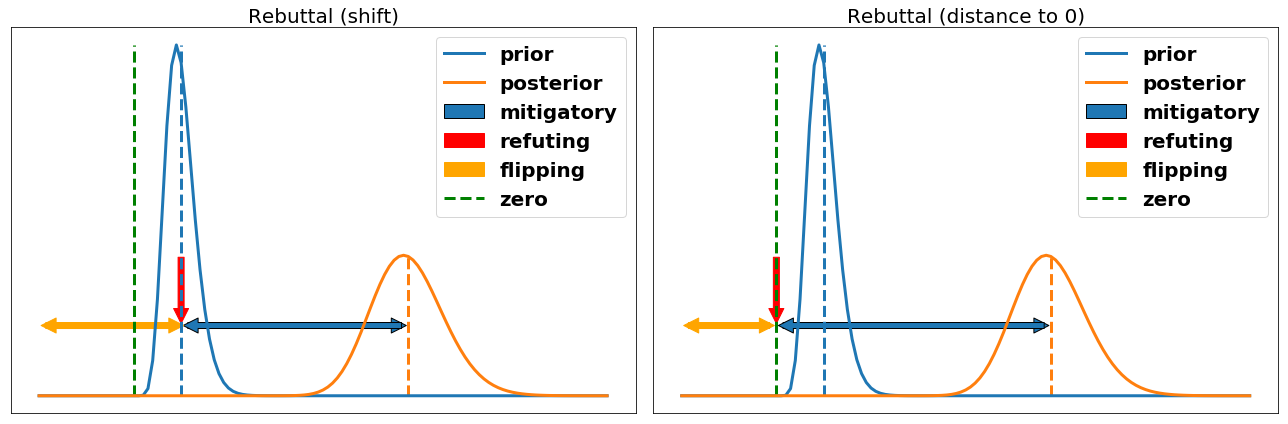

In [8]:
#plot it

x_gamma = np.linspace(-20, 100, 120+1)
s= 1
g_p = 10
gamma_p = gamma.pdf(x_gamma, g_p, scale=s)

#small impact
g_1 = g_p + 4
gamma_1 = gamma.pdf(x_gamma, g_1, scale=s)

#large effect
g_2 = g_p + 20
gamma_2 = gamma.pdf(x_gamma, g_2, scale=s)

#large group
g_3 = g_p + 28
gamma_3 = gamma.pdf(x_gamma, g_3, scale=s)

#strong moral concideration
g_4 = g_p + 12
gamma_4 = gamma.pdf(x_gamma, g_4, scale=s)

#large group + large effect
g_5 = g_2 + g_3 - g_p
gamma_5 = gamma.pdf(x_gamma, g_5, scale=s)

import matplotlib.patches as mpatches
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18,6))
#x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']

fs_tick_labels = 15

#mitigatory
arrow_shift_right_mit = mpatches.FancyArrowPatch((g_p*s+1,0.5*gamma_5.max()), (g_5*s,0.5*gamma_5.max()),
                                 mutation_scale=30)
arrow_shift_left_mit = mpatches.FancyArrowPatch((g_5*s-1,0.5*gamma_5.max()), (g_p*s,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'mitigatory')

#refuting
arrow_shift_ref = mpatches.FancyArrowPatch((g_p*s,gamma_5.max()), (g_p*s,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'refuting', color='red')

#flipping
arrow_shift_right_flip = mpatches.FancyArrowPatch((-19,0.5*gamma_5.max()), (g_p*s+1,0.5*gamma_5.max()),
                                 mutation_scale=30, color='orange')
arrow_shift_left_flip = mpatches.FancyArrowPatch((g_p*s-1,0.5*gamma_5.max()), (-20,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'flipping', color='orange')



axs[0].add_patch(arrow_shift_right_mit)
axs[0].add_patch(arrow_shift_left_mit)
axs[0].add_patch(arrow_shift_ref)
axs[0].add_patch(arrow_shift_right_flip)
axs[0].add_patch(arrow_shift_left_flip)
axs[0].plot(x_gamma, gamma_p, label='prior', linewidth=3)
axs[0].plot(x_gamma, gamma_5, label='posterior', linewidth=3)
axs[0].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=3)
axs[0].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=3)
axs[0].vlines(0, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="green", label='zero', linewidth=3)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].legend(prop={'size': 20})
axs[0].set_title('Rebuttal (shift)', fontsize=20)

#mitigatory
arrow_abs_right_mit = mpatches.FancyArrowPatch((0+1,0.5*gamma_5.max()), (g_5*s,0.5*gamma_5.max()),
                                 mutation_scale=30)
arrow_abs_left_mit = mpatches.FancyArrowPatch((g_5*s-1,0.5*gamma_5.max()), (0,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'mitigatory')

#refuting
arrow_abs_ref = mpatches.FancyArrowPatch((0,gamma_5.max()), (0,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'refuting', color='red')

#flipping
arrow_abs_right_flip = mpatches.FancyArrowPatch((-19,0.5*gamma_5.max()), (0,0.5*gamma_5.max()),
                                 mutation_scale=30, color='orange')
arrow_abs_left_flip = mpatches.FancyArrowPatch((-1,0.5*gamma_5.max()), (-20,0.5*gamma_5.max()),
                                 mutation_scale=30, label = 'flipping', color='orange')


axs[1].add_patch(arrow_abs_right_mit)
axs[1].add_patch(arrow_abs_left_mit)
axs[1].add_patch(arrow_abs_ref)
axs[1].add_patch(arrow_abs_right_flip)
axs[1].add_patch(arrow_abs_left_flip)
axs[1].plot(x_gamma, gamma_p, label='prior', linewidth=3)
axs[1].plot(x_gamma, gamma_5, label='posterior', linewidth=3)
axs[1].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=3)
axs[1].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=3)
axs[1].vlines(0, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="green", label='zero', linewidth=3)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xticklabels([])
axs[1].set_xticks([])
axs[1].legend(prop={'size': 20})
axs[1].set_title('Rebuttal (distance to 0)', fontsize=20)


plt.tight_layout()
plt.savefig('shift_vs_distance0_rebuttal.png', dpi=300)

plt.show();

# Direct rebuttal: Mitigatory rebuttal

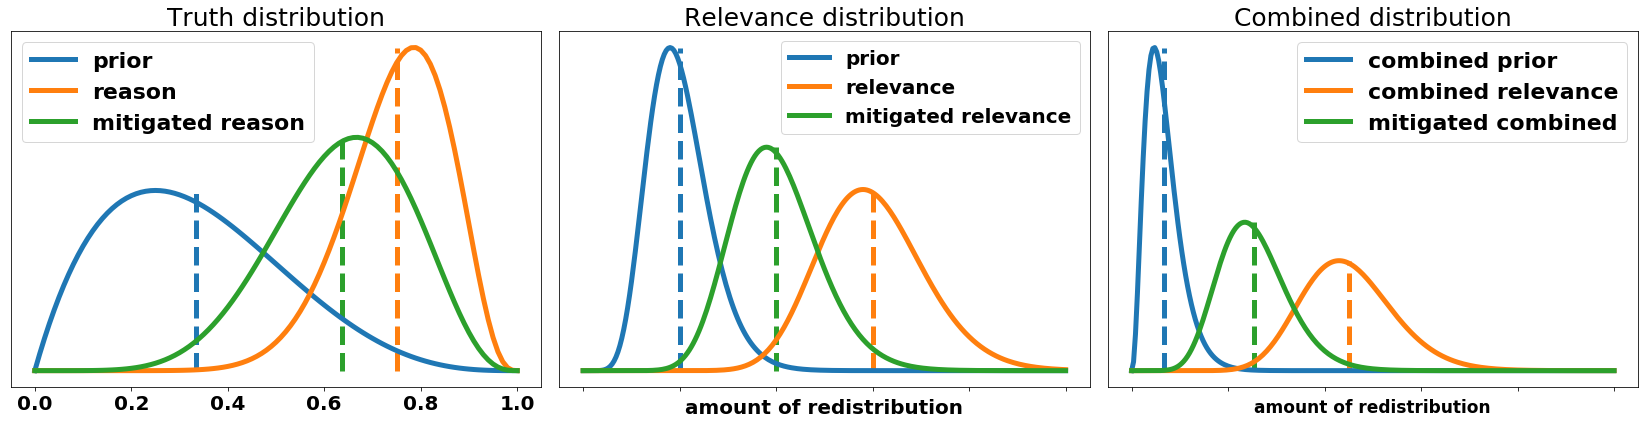

In [9]:
from scipy.stats import beta, gamma

fs_tick_labels = 15
x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

#truth
x_gn = np.linspace(0,1, 100 +1)
#prior
a_p_gn, b_p_gn = 2, 4
beta_p_gn = beta.pdf(x_gn, a_p_gn, b_p_gn)
beta_p_exp_gn = a_p_gn/(a_p_gn+b_p_gn)

#some update 
a_1_gn, b_1_gn = a_p_gn + 10, b_p_gn
beta_1_gn = beta.pdf(x_gn, a_1_gn, b_1_gn)
beta_1_exp_gn = a_1_gn/(a_1_gn+b_1_gn)

#some mitigatory rebuttal
a_2_gn, b_2_gn = a_1_gn -5, b_1_gn
beta_2_gn = beta.pdf(x_gn, a_2_gn, b_2_gn)
beta_2_exp_gn = a_2_gn/(a_2_gn+b_2_gn)


#relevance 

x_gamma_gn = np.linspace(0, 50, 250+1)

#prior
s_gn= 1
g_p_gn = 10
gamma_p_gn = gamma.pdf(x_gamma_gn, g_p_gn, scale=s_gn)

#small impact
g_1_gn = g_p_gn + 20
gamma_1_gn = gamma.pdf(x_gamma_gn, g_1_gn, scale=s_gn)

#mitigatory rebuttal
g_2_gn = g_1_gn - 10
gamma_2_gn = gamma.pdf(x_gamma_gn, g_2_gn, scale=s_gn)

#combined

def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p_gn, gamma_beta_p_gn = gamma_beta(x_gamma_gn, a_p_gn, b_p_gn, g_p_gn, s_gn)
gb_exp_1_1_gn, gamma_beta_1_1_gn = gamma_beta(x_gamma_gn, a_1_gn, b_1_gn, g_1_gn, s_gn)
gb_exp_2_2_gn, gamma_beta_2_2_gn = gamma_beta(x_gamma_gn, a_2_gn, b_2_gn, g_2_gn, s_gn)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x_gn, beta_p_gn, label='prior', linewidth=5)
axs[0].plot(x_gn, beta_1_gn, label='reason', linewidth=5)
axs[0].plot(x_gn, beta_2_gn, label='mitigated reason', linewidth=5)
axs[0].vlines(beta_p_exp_gn, ymin=0, ymax=1*beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0].vlines(beta_1_exp_gn, ymin=0, ymax=1*beta_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0].vlines(beta_2_exp_gn, ymin=0, ymax=1*beta_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].legend(prop={'size': 22})
axs[0].set_title('Truth distribution', fontdict={'fontsize': 25})

axs[1].plot(x_gamma_gn, gamma_p_gn, label='prior', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_1_gn, label='relevance', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_2_gn, label='mitigated relevance', linewidth=5)
axs[1].vlines(g_p_gn*s_gn, ymin=0, ymax=1*gamma_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1].vlines(g_1_gn*s_gn, ymin=0, ymax=1*gamma_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1].vlines(g_2_gn*s_gn, ymin=0, ymax=1*gamma_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
#axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_xticklabels([])
axs[1].set_xlabel('amount of redistribution', fontsize=20)
axs[1].legend(prop={'size': 20})
axs[1].set_title('Relevance distribution', fontdict={'fontsize': 25})

axs[2].plot(x_gamma_gn, gamma_beta_p_gn, label='combined prior', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_1_1_gn, label='combined relevance', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_2_2_gn, label='mitigated combined', linewidth=5)
axs[2].vlines(gb_exp_p_gn*s_gn*g_p_gn, ymin=0, ymax=1*gamma_beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2].vlines(gb_exp_1_1_gn*s_gn*g_1_gn, ymin=0, ymax=1*gamma_beta_1_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2].vlines(gb_exp_2_2_gn*s_gn*g_2_gn, ymin=0, ymax=1*gamma_beta_2_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
#axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].set_xticklabels([])
axs[2].set_xlabel('amount of redistribution', fontsize=17)
axs[2].legend(prop={'size': 22})
axs[2].set_title('Combined distribution', fontdict={'fontsize': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize = 20)

plt.tight_layout()
plt.savefig('mitigatory_rebuttal.png', dpi=300)

plt.show();

# Direct rebuttal: Refuting rebuttal

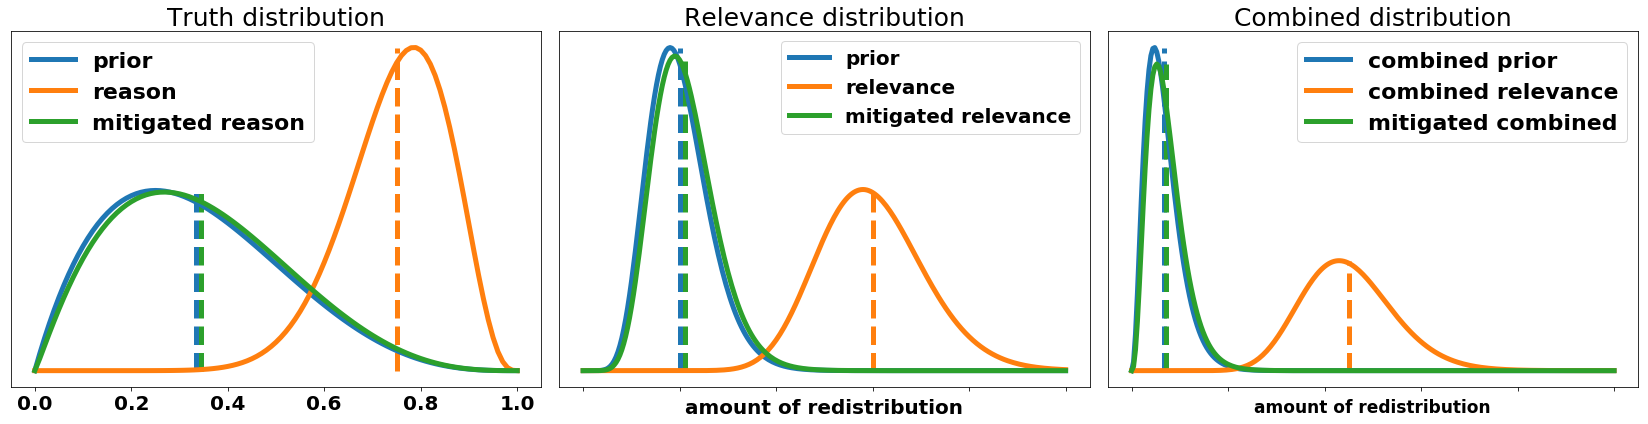

In [10]:
from scipy.stats import beta, gamma

fs_tick_labels = 15
x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

#truth
x_gn = np.linspace(0,1, 100 +1)
#prior
a_p_gn, b_p_gn = 2, 4
beta_p_gn = beta.pdf(x_gn, a_p_gn, b_p_gn)
beta_p_exp_gn = a_p_gn/(a_p_gn+b_p_gn)

#some update 
a_1_gn, b_1_gn = a_p_gn + 10, b_p_gn
beta_1_gn = beta.pdf(x_gn, a_1_gn, b_1_gn)
beta_1_exp_gn = a_1_gn/(a_1_gn+b_1_gn)

#some mitigatory rebuttal
a_2_gn, b_2_gn = a_1_gn -9.9, b_1_gn
beta_2_gn = beta.pdf(x_gn, a_2_gn, b_2_gn)
beta_2_exp_gn = a_2_gn/(a_2_gn+b_2_gn)


#relevance 

x_gamma_gn = np.linspace(0, 50, 250+1)

#prior
s_gn= 1
g_p_gn = 10
gamma_p_gn = gamma.pdf(x_gamma_gn, g_p_gn, scale=s_gn)

#small impact
g_1_gn = g_p_gn + 20
gamma_1_gn = gamma.pdf(x_gamma_gn, g_1_gn, scale=s_gn)

#mitigatory rebuttal
g_2_gn = g_1_gn - 19.5
gamma_2_gn = gamma.pdf(x_gamma_gn, g_2_gn, scale=s_gn)

#combined

def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p_gn, gamma_beta_p_gn = gamma_beta(x_gamma_gn, a_p_gn, b_p_gn, g_p_gn, s_gn)
gb_exp_1_1_gn, gamma_beta_1_1_gn = gamma_beta(x_gamma_gn, a_1_gn, b_1_gn, g_1_gn, s_gn)
gb_exp_2_2_gn, gamma_beta_2_2_gn = gamma_beta(x_gamma_gn, a_2_gn, b_2_gn, g_2_gn, s_gn)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x_gn, beta_p_gn, label='prior', linewidth=5)
axs[0].plot(x_gn, beta_1_gn, label='reason', linewidth=5)
axs[0].plot(x_gn, beta_2_gn, label='mitigated reason', linewidth=5)
axs[0].vlines(beta_p_exp_gn, ymin=0, ymax=1*beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0].vlines(beta_1_exp_gn, ymin=0, ymax=1*beta_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0].vlines(beta_2_exp_gn, ymin=0, ymax=1*beta_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].legend(prop={'size': 22})
axs[0].set_title('Truth distribution', fontdict={'fontsize': 25})

axs[1].plot(x_gamma_gn, gamma_p_gn, label='prior', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_1_gn, label='relevance', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_2_gn, label='mitigated relevance', linewidth=5)
axs[1].vlines(g_p_gn*s_gn, ymin=0, ymax=1*gamma_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1].vlines(g_1_gn*s_gn, ymin=0, ymax=1*gamma_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1].vlines(g_2_gn*s_gn, ymin=0, ymax=1*gamma_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
#axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_xticklabels([])
axs[1].set_xlabel('amount of redistribution', fontsize=20)
axs[1].legend(prop={'size': 20})
axs[1].set_title('Relevance distribution', fontdict={'fontsize': 25})

axs[2].plot(x_gamma_gn, gamma_beta_p_gn, label='combined prior', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_1_1_gn, label='combined relevance', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_2_2_gn, label='mitigated combined', linewidth=5)
axs[2].vlines(gb_exp_p_gn*s_gn*g_p_gn, ymin=0, ymax=1*gamma_beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2].vlines(gb_exp_1_1_gn*s_gn*g_1_gn, ymin=0, ymax=1*gamma_beta_1_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2].vlines(gb_exp_2_2_gn*s_gn*g_2_gn, ymin=0, ymax=1*gamma_beta_2_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
#axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].set_xticklabels([])
axs[2].set_xlabel('amount of redistribution', fontsize=17)
axs[2].legend(prop={'size': 22})
axs[2].set_title('Combined distribution', fontdict={'fontsize': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize = 20)

plt.tight_layout()
plt.savefig('refuting_rebuttal.png', dpi=300)

plt.show();

# Direct rebuttal: Flipping rebuttal

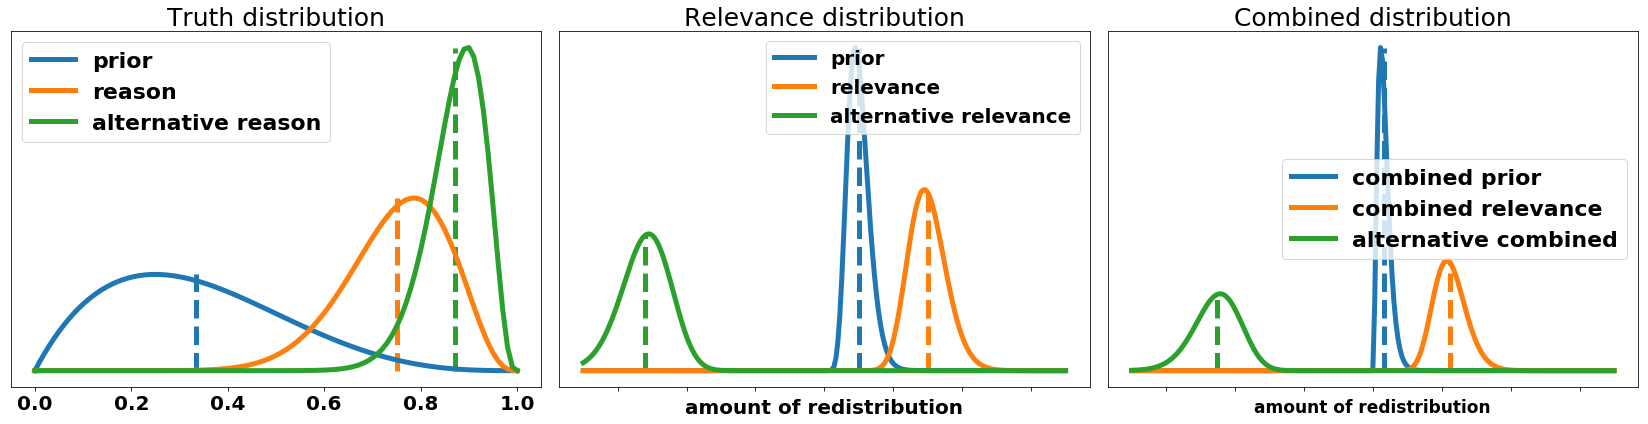

In [11]:
from scipy.stats import beta, gamma

fs_tick_labels = 15
x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

#truth
x_gn = np.linspace(0,1, 100 +1)
#prior
a_p_gn, b_p_gn = 2, 4
beta_p_gn = beta.pdf(x_gn, a_p_gn, b_p_gn)
beta_p_exp_gn = a_p_gn/(a_p_gn+b_p_gn)

#some update 
a_1_gn, b_1_gn = a_p_gn + 10, b_p_gn
beta_1_gn = beta.pdf(x_gn, a_1_gn, b_1_gn)
beta_1_exp_gn = a_1_gn/(a_1_gn+b_1_gn)

#some mitigatory rebuttal
a_2_gn, b_2_gn = a_1_gn +15, b_1_gn
beta_2_gn = beta.pdf(x_gn, a_2_gn, b_2_gn)
beta_2_exp_gn = a_2_gn/(a_2_gn+b_2_gn)


#relevance 

x_gamma_gn = np.linspace(-70, 70, 250+1)

#prior
s_gn= 1
g_p_gn = 10
gamma_p_gn = gamma.pdf(x_gamma_gn, g_p_gn, scale=s_gn)

#small impact
g_1_gn = g_p_gn + 20
gamma_1_gn = gamma.pdf(x_gamma_gn, g_1_gn, scale=s_gn)

#mitigatory rebuttal
g_2_gn = g_1_gn + 22
gamma_2_gn = gamma.pdf(x_gamma_gn, g_2_gn, scale=s_gn)
gamma_2_gn = np.flip(gamma_2_gn)

#combined

def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p_gn, gamma_beta_p_gn = gamma_beta(x_gamma_gn, a_p_gn, b_p_gn, g_p_gn, s_gn)
gb_exp_1_1_gn, gamma_beta_1_1_gn = gamma_beta(x_gamma_gn, a_1_gn, b_1_gn, g_1_gn, s_gn)
gb_exp_2_2_gn, gamma_beta_2_2_gn = gamma_beta(x_gamma_gn, a_2_gn, b_2_gn, g_2_gn, s_gn)
gb_exp_2_2_gn = -gb_exp_2_2_gn
gamma_beta_2_2_gn = np.flip(gamma_beta_2_2_gn)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x_gn, beta_p_gn, label='prior', linewidth=5)
axs[0].plot(x_gn, beta_1_gn, label='reason', linewidth=5)
axs[0].plot(x_gn, beta_2_gn, label='alternative reason', linewidth=5)
axs[0].vlines(beta_p_exp_gn, ymin=0, ymax=1*beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0].vlines(beta_1_exp_gn, ymin=0, ymax=1*beta_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0].vlines(beta_2_exp_gn, ymin=0, ymax=1*beta_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].legend(prop={'size': 22})
axs[0].set_title('Truth distribution', fontdict={'fontsize': 25})

axs[1].plot(x_gamma_gn, gamma_p_gn, label='prior', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_1_gn, label='relevance', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_2_gn, label='alternative relevance', linewidth=5)
axs[1].vlines(g_p_gn*s_gn, ymin=0, ymax=1*gamma_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1].vlines(g_1_gn*s_gn, ymin=0, ymax=1*gamma_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1].vlines(-g_2_gn*s_gn, ymin=0, ymax=1*gamma_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
#axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_xticklabels([])
axs[1].set_xlabel('amount of redistribution', fontsize=20)
axs[1].legend(prop={'size': 20})
axs[1].set_title('Relevance distribution', fontdict={'fontsize': 25})

axs[2].plot(x_gamma_gn, gamma_beta_p_gn, label='combined prior', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_1_1_gn, label='combined relevance', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_2_2_gn, label='alternative combined', linewidth=5)
axs[2].vlines(gb_exp_p_gn*s_gn*g_p_gn, ymin=0, ymax=1*gamma_beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2].vlines(gb_exp_1_1_gn*s_gn*g_1_gn, ymin=0, ymax=1*gamma_beta_1_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2].vlines(gb_exp_2_2_gn*s_gn*g_2_gn, ymin=0, ymax=1*gamma_beta_2_2_gn.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
#axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].set_xticklabels([])
axs[2].set_xlabel('amount of redistribution', fontsize=17)
axs[2].legend(prop={'size': 22})
axs[2].set_title('Combined distribution', fontdict={'fontsize': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize = 20)

plt.tight_layout()
plt.savefig('flipping_rebuttal.png', dpi=300)

plt.show();

# Analysis Extension: 

In [13]:
#create some distributions
from scipy.stats import beta, gamma

x = np.linspace(0,1, 100 +1)
#prior
a_p, b_p = 1.3, 5
beta_p = beta.pdf(x, a_p, b_p)
beta_p_exp = a_p/(a_p+b_p)

#weak evidence
a_1, b_1 = a_p + 0.2, b_p
beta_1 = beta.pdf(x, a_1, b_1)
beta_1_exp = a_1/(a_1+b_1)

#mediocre evidence
a_2, b_2 = a_p + 0.5, b_p
beta_2 = beta.pdf(x, a_2, b_2)
beta_2_exp = a_2/(a_2+b_2)

#mediocre mechanism
a_3, b_3 = a_p + 3, b_p
beta_3 = beta.pdf(x, a_3, b_3)
beta_3_exp = a_3/(a_3+b_3)

#strong mechanism
a_4, b_4 = a_p + 30, b_p
beta_4 = beta.pdf(x, a_4, b_4)
beta_4_exp = a_4/(a_4+b_4)

#closing for scenario 2
a_sc2, b_sc2 = 0.2 + 0.5 + 3 + a_4, b_4 
beta_sc2 = beta.pdf(x, a_sc2, b_sc2)
beta_sc2_exp = a_sc2/(a_sc2+b_sc2)

#closing for scenario 3
a_sc3, b_sc3 = a_p + 3 + 30, b_p
beta_sc3 = beta.pdf(x, a_sc3, b_sc3)
beta_sc3_exp = a_sc3/(a_sc3+b_sc3)

#closing for scenario 4
a_sc4, b_sc4 = a_p + 2, b_p
beta_sc4 = beta.pdf(x, a_sc4, b_sc4)
beta_sc4_exp = a_sc4/(a_sc4+b_sc4)

#closing for scenario 4x
a_sc4x, b_sc4x = a_p + 36, b_p
beta_sc4x = beta.pdf(x, a_sc4x, b_sc4x)
beta_sc4x_exp = a_sc4x/(a_sc4x+b_sc4x)



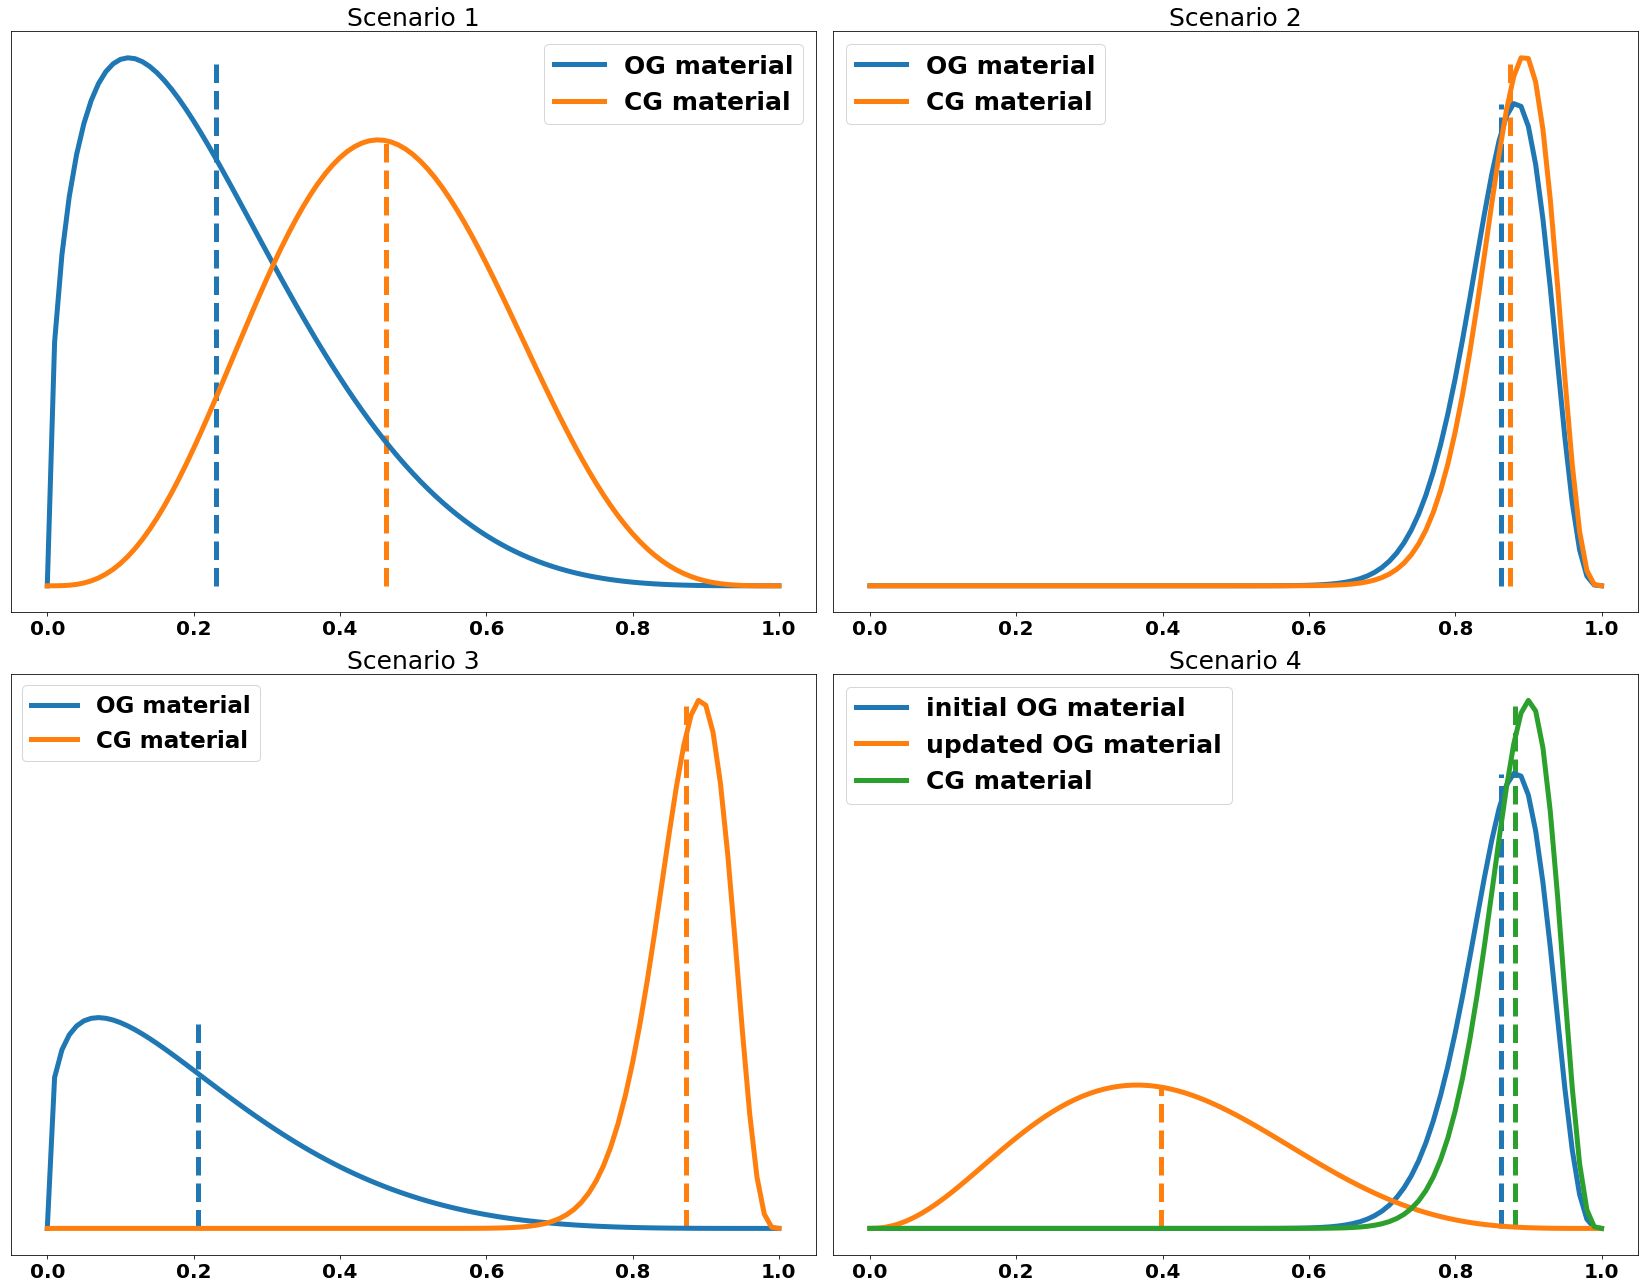

In [14]:
#plot it
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(23, 18))

axs[0][0].plot(x, beta_1, label='OG material', linewidth=5)
axs[0][0].plot(x, beta_3, label='CG material', linewidth=5)
axs[0][0].vlines(beta_1_exp, ymin=0, ymax=1*beta_1.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][0].vlines(beta_3_exp, ymin=0, ymax=1*beta_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].legend(prop={'size': 25})
axs[0][0].set_title('Scenario 1', fontdict={'fontsize': 25})

axs[0][1].plot(x, beta_4, label='OG material', linewidth=5)
axs[0][1].plot(x, beta_sc2, label='CG material', linewidth=5)
axs[0][1].vlines(beta_4_exp, ymin=0, ymax=1*beta_4.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][1].vlines(beta_sc2_exp, ymin=0, ymax=1*beta_sc2.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].legend(prop={'size': 25})
axs[0][1].set_title('Scenario 2', fontdict={'fontsize': 25})

axs[1][0].plot(x, beta_p, label='OG material', linewidth=5)
axs[1][0].plot(x, beta_sc3, label='CG material', linewidth=5)
axs[1][0].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][0].vlines(beta_sc3_exp, ymin=0, ymax=1*beta_sc3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].legend(prop={'size': 23})
axs[1][0].set_title('Scenario 3', fontdict={'fontsize': 25})

axs[1][1].plot(x, beta_4, label='initial OG material', linewidth=5)
axs[1][1].plot(x, beta_sc4, label='updated OG material', linewidth=5)
axs[1][1].plot(x, beta_sc4x, label='CG material', linewidth=5)
axs[1][1].vlines(beta_4_exp, ymin=0, ymax=1*beta_4.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][1].vlines(beta_sc4_exp, ymin=0, ymax=1*beta_sc4.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][1].vlines(beta_sc4x_exp, ymin=0, ymax=1*beta_sc4x.max(), linestyle='dashed', alpha=1, color="#2ca02c", linewidth=5)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].legend(prop={'size': 25})
axs[1][1].set_title('Scenario 4', fontdict={'fontsize': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(fontsize = 20)

plt.tight_layout()
plt.savefig('analysis_extension.png', dpi=200)

plt.show();

# Impact extensions: 

In [15]:
# create some impact distributions
from scipy.stats import gamma
x_gamma = np.linspace(0, 100, 250+1)

#prior

s= 1
g_p = 10
gamma_p = gamma.pdf(x_gamma, g_p, scale=s)

#small impact
g_1 = g_p + 4
gamma_1 = gamma.pdf(x_gamma, g_1, scale=s)

#large effect
g_2 = g_p + 20
gamma_2 = gamma.pdf(x_gamma, g_2, scale=s)

#large group
g_3 = g_p + 28
gamma_3 = gamma.pdf(x_gamma, g_3, scale=s)

#strong moral concideration
g_4 = g_p + 12
gamma_4 = gamma.pdf(x_gamma, g_4, scale=s)

#large group + large effect
g_5 = g_2 + g_3 - g_p
gamma_5 = gamma.pdf(x_gamma, g_5, scale=s)

#scenario 4
g_sc4 = g_p + 40
gamma_sc4 = gamma.pdf(x_gamma, g_sc4, scale=s)

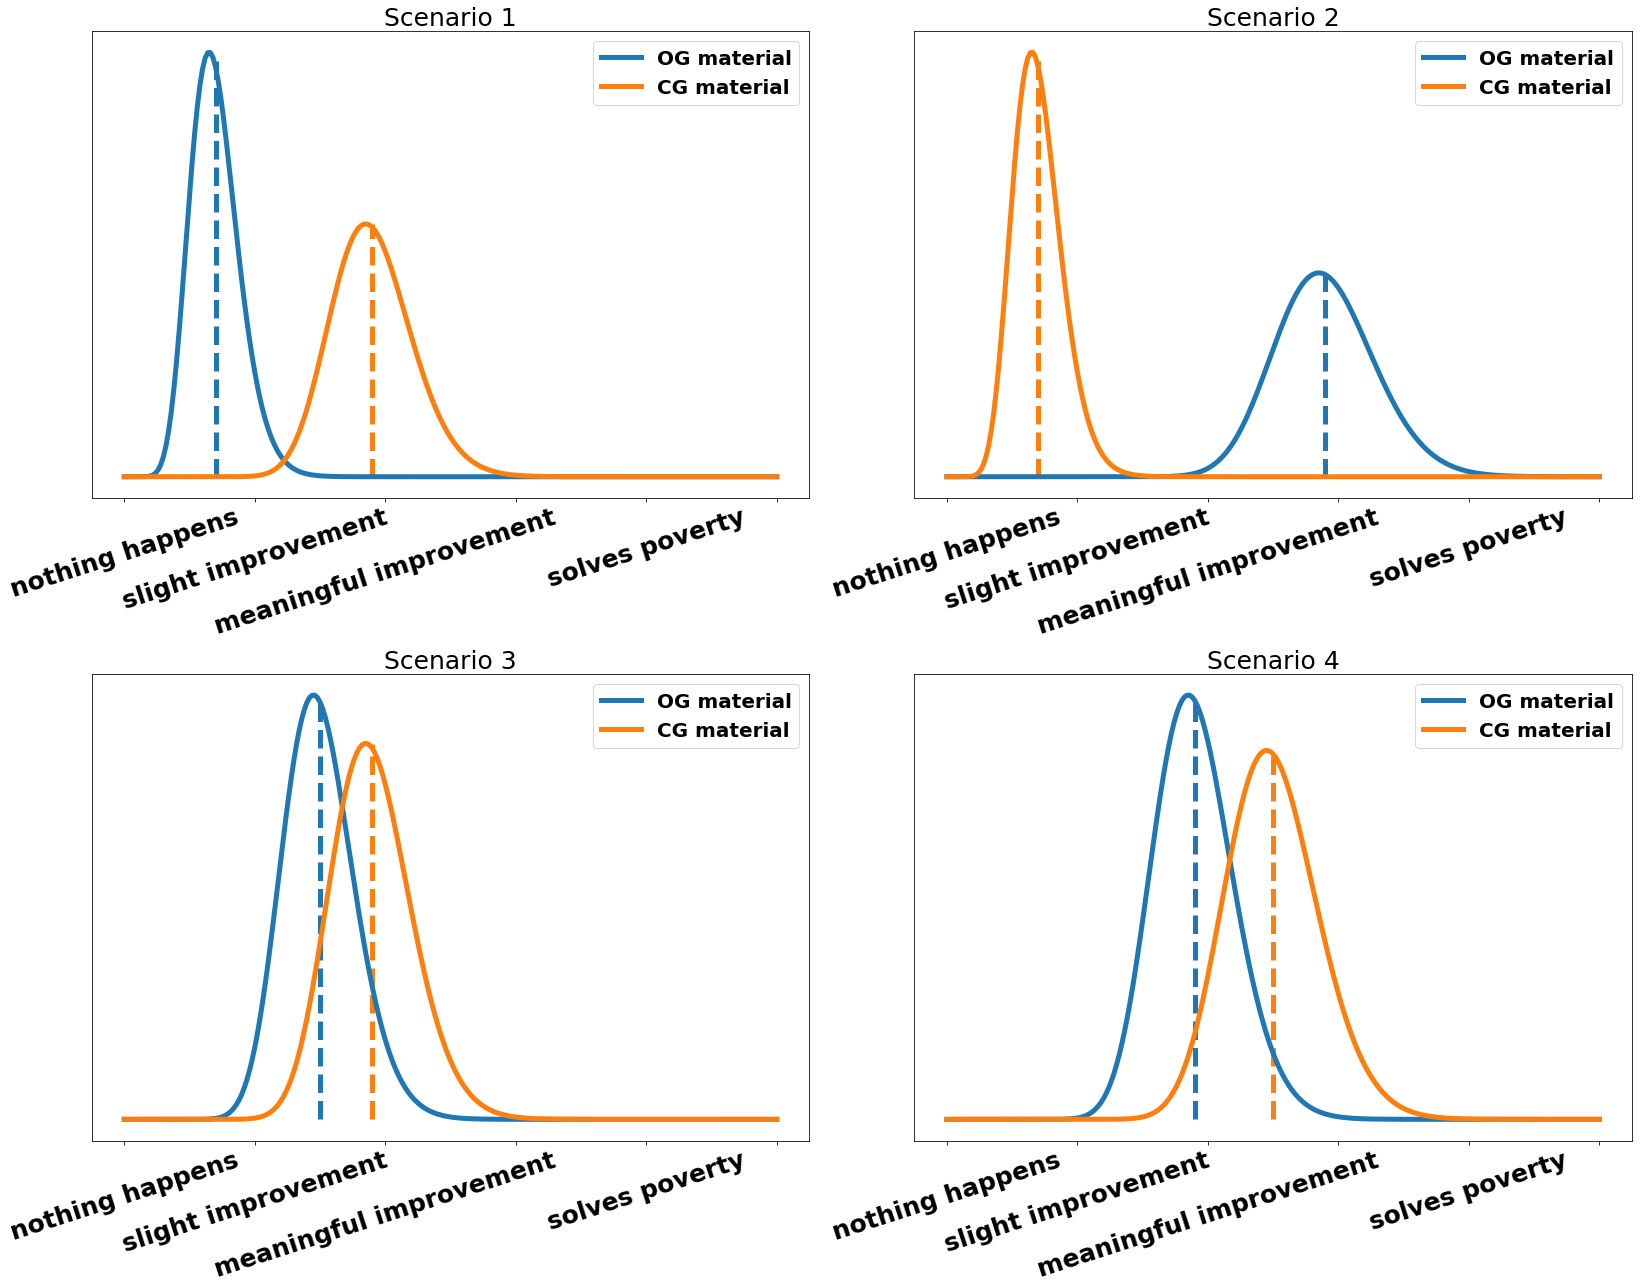

In [16]:
#plot it
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(23, 18))
x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']

fs_tick_labels = 15

axs[0][0].plot(x_gamma, gamma_1, label='OG material', linewidth=5)
axs[0][0].plot(x_gamma, gamma_3, label='CG material', linewidth=5)
axs[0][0].vlines(g_1*s, ymin=0, ymax=1*gamma_1.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][0].vlines(g_3*s, ymin=0, ymax=1*gamma_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][0].legend(prop={'size': 20})
axs[0][0].set_title('Scenario 1', fontdict={'fontsize': 25})

axs[0][1].plot(x_gamma, gamma_5, label='OG material', linewidth=5)
axs[0][1].plot(x_gamma, gamma_1, label='CG material', linewidth=5)
axs[0][1].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][1].vlines(g_1*s, ymin=0, ymax=1*gamma_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][1].legend(prop={'size': 20})
axs[0][1].set_title('Scenario 2', fontdict={'fontsize': 25})


axs[1][0].plot(x_gamma, gamma_2, label='OG material', linewidth=5)
axs[1][0].plot(x_gamma, gamma_3, label='CG material', linewidth=5)
axs[1][0].vlines(g_2*s, ymin=0, ymax=1*gamma_2.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][0].vlines(g_3*s, ymin=0, ymax=1*gamma_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][0].legend(prop={'size': 20})
axs[1][0].set_title('Scenario 3', fontdict={'fontsize': 25})

axs[1][1].plot(x_gamma, gamma_3, label='OG material', linewidth=5)
axs[1][1].plot(x_gamma, gamma_sc4, label='CG material', linewidth=5)
axs[1][1].vlines(g_3*s, ymin=0, ymax=1*gamma_3.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][1].vlines(g_sc4*s, ymin=0, ymax=1*gamma_sc4.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][1].legend(prop={'size': 20})
axs[1][1].set_title('Scenario 4', fontdict={'fontsize': 25})


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18, fontsize=25)

plt.tight_layout()
plt.savefig('impact_extension.png', dpi=200)

plt.show();